In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: xlabel='Species', ylabel='Count'>

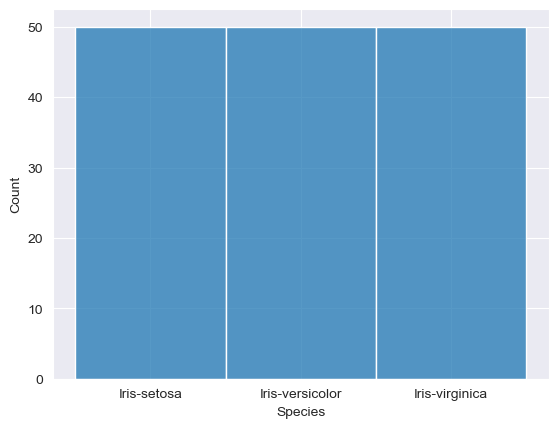

In [6]:
sns.histplot((data['Species']))

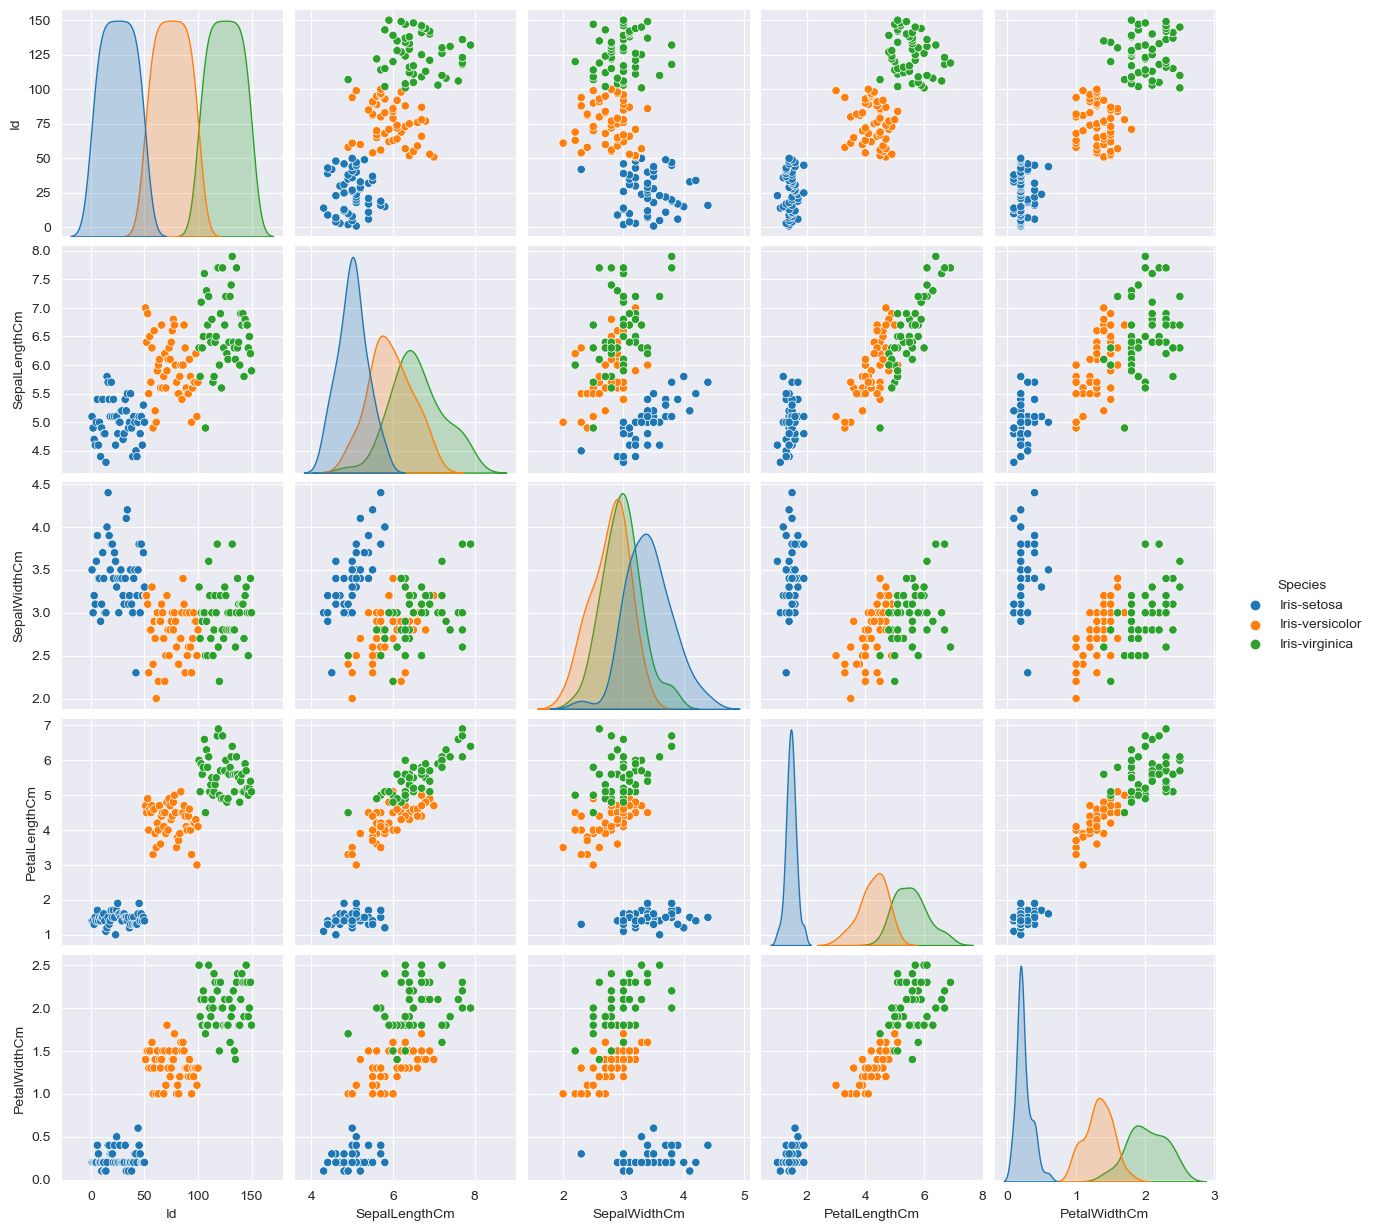

In [10]:
sns.pairplot(data, hue='Species')

In [13]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
readyData = pd.get_dummies(data, columns=['Species'], drop_first=True )

In [17]:
readyData

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,1
146,147,6.3,2.5,5.0,1.9,0,1
147,148,6.5,3.0,5.2,2.0,0,1
148,149,6.2,3.4,5.4,2.3,0,1


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train,y_test = train_test_split(data.drop(["Id","Species"], axis=1),data['Species'], test_size=0.25,random_state=21)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
random_model = RandomForestClassifier(n_estimators=100)

In [24]:
random_model.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
outcome = random_model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(confusion_matrix(y_test,outcome))

[[13  0  0]
 [ 0 12  3]
 [ 0  0 10]]


In [28]:
print(classification_report(y_test,outcome))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.77      1.00      0.87        10

       accuracy                           0.92        38
      macro avg       0.92      0.93      0.92        38
   weighted avg       0.94      0.92      0.92        38



In [29]:
all_combination = {'n_estimators':[120,150, 70, 200, 300], 'max_depth':[20, 140,40, 70]}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=all_combination, verbose=3)

In [32]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....max_depth=20, n_estimators=120;, score=1.000 total time=   0.1s
[CV 2/5] END ....max_depth=20, n_estimators=120;, score=0.913 total time=   0.0s
[CV 3/5] END ....max_depth=20, n_estimators=120;, score=1.000 total time=   0.0s
[CV 4/5] END ....max_depth=20, n_estimators=120;, score=1.000 total time=   0.0s
[CV 5/5] END ....max_depth=20, n_estimators=120;, score=1.000 total time=   0.0s
[CV 1/5] END ....max_depth=20, n_estimators=150;, score=1.000 total time=   0.0s
[CV 2/5] END ....max_depth=20, n_estimators=150;, score=0.913 total time=   0.0s
[CV 3/5] END ....max_depth=20, n_estimators=150;, score=1.000 total time=   0.0s
[CV 4/5] END ....max_depth=20, n_estimators=150;, score=1.000 total time=   0.0s
[CV 5/5] END ....max_depth=20, n_estimators=150;, score=1.000 total time=   0.0s
[CV 1/5] END .....max_depth=20, n_estimators=70;, score=1.000 total time=   0.0s
[CV 2/5] END .....max_depth=20, n_estimators=70

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 140, 40, 70],
                         'n_estimators': [120, 150, 70, 200, 300]},
             verbose=3)

In [33]:
grid.best_params_

{'max_depth': 20, 'n_estimators': 120}

In [34]:
advanced_output = grid.predict(x_test)

In [35]:
print(classification_report(y_test,advanced_output))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.77      1.00      0.87        10

       accuracy                           0.92        38
      macro avg       0.92      0.93      0.92        38
   weighted avg       0.94      0.92      0.92        38



In [36]:
print(confusion_matrix(y_test,advanced_output))

[[13  0  0]
 [ 0 12  3]
 [ 0  0 10]]
